# **Importing Libraries**

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd


In [2]:
data=pd.read_csv('/content/heart.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# **Cheking Outliers**

In [5]:
import seaborn as sns


<AxesSubplot:xlabel='MaxHR'>

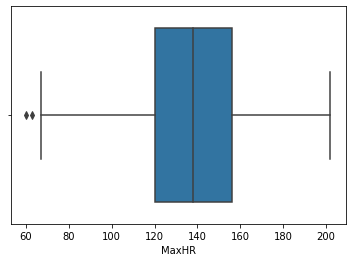

In [6]:
sns.boxplot(x=data['MaxHR'])

<AxesSubplot:xlabel='Oldpeak'>

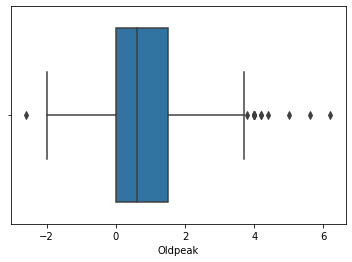

In [7]:
sns.boxplot(x=data['Oldpeak'])

<AxesSubplot:xlabel='Cholesterol'>

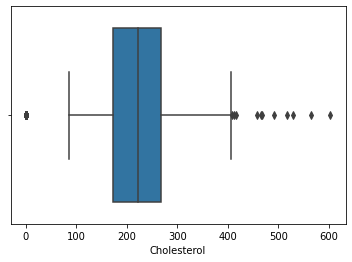

In [8]:
sns.boxplot(x=data['Cholesterol'])

<AxesSubplot:xlabel='RestingBP'>

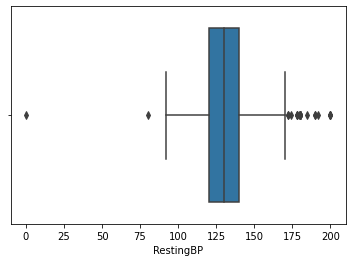

In [9]:
sns.boxplot(x=data['RestingBP'])

# **Handling Outliers**

In [10]:
q1=data['MaxHR'].quantile(0.25)
q3=data['MaxHR'].quantile(0.75)
iqr=q3-q1

In [11]:
iqr

36.0

In [12]:
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
upper_limit,lower_limit

(210.0, 66.0)

In [13]:
def limit_imputer(value):
  if value > upper_limit:
    return upper_limit
  elif value <lower_limit:
    return lower_limit
  else:
    return value

In [14]:
data['MaxHR']=data['MaxHR'].apply(limit_imputer)

<AxesSubplot:xlabel='MaxHR'>

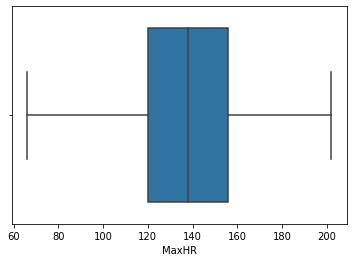

In [15]:
# boxplot after removing outlier
sns.boxplot(x=data['MaxHR'])

In [16]:
q1=data['Oldpeak'].quantile(0.25)
q3=data['Oldpeak'].quantile(0.75)
iqr=q3-q1

In [17]:
iqr


1.5

In [18]:
upper_limit=q3+1.5*iqr
lower_limit=q1 - 1.5*iqr
upper_limit,lower_limit

(3.75, -2.25)

In [19]:
#Elimination of outlier
def limit_imputer(value):
	if value > upper_limit:
		return upper_limit
	if value < lower_limit:
		return lower_limit
	else:
		return value

In [20]:
data['Oldpeak'] = data['Oldpeak'].apply(limit_imputer)

<AxesSubplot:xlabel='Oldpeak'>

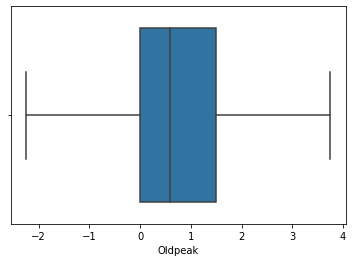

In [21]:
# boxplot after removing outlier

sns.boxplot(x=data['Oldpeak'])

In [22]:
q1=data['RestingBP'].quantile(0.25)
q3=data['RestingBP'].quantile(0.75)
iqr=q3-q1

In [23]:
iqr

20.0

In [24]:
upper_limit =q3 + 1.5 *iqr
lower_limit = q1- 1.5* iqr
upper_limit, lower_limit

(170.0, 90.0)

In [25]:
#Elimination of outlier
def limit_imputer(value):
  if value > upper_limit:
    return upper_limit
  elif value < lower_limit:
    return lower_limit
  else:
    return value

In [26]:
data['RestingBP']=data['RestingBP'].apply(limit_imputer)

<AxesSubplot:xlabel='RestingBP'>

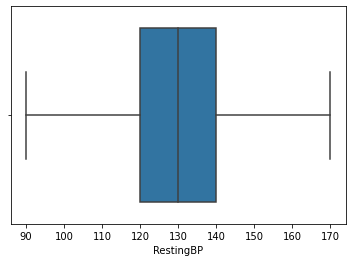

In [27]:
sns.boxplot(x=data['RestingBP'])

In [28]:
q1=data['Cholesterol'].quantile(0.25)
q3=data['Cholesterol'].quantile(0.75)
iqr=q3-q1

In [29]:
iqr

93.75

In [30]:
upper_limit =q3 + 1.5 *iqr
lower_limit = q1- 1.5* iqr
upper_limit, lower_limit

(407.625, 32.625)

In [31]:
#Elimination of outlier
def limit_imputer(value):
	if value > upper_limit:
		return upper_limit
	if value < lower_limit:
		return lower_limit
	else:
		return value

In [32]:
data['Cholesterol']=data['Cholesterol'].apply(limit_imputer)

<AxesSubplot:xlabel='Cholesterol'>

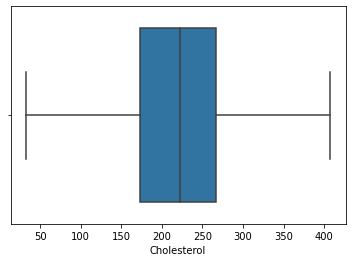

In [33]:
sns.boxplot(x=data['Cholesterol'])

# **Missing Values**

In [34]:
#here no missing values present
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    float64
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 86.2+ KB


# **One Hot Encoding**

In [35]:
# One Hot Encoding for categorical data 
OneHotEncoding= pd.get_dummies(data, columns=['ChestPainType','Sex','RestingECG','ExerciseAngina','ST_Slope' ], drop_first = True)

In [36]:
OneHotEncoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    float64
 2   Cholesterol        918 non-null    float64
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    float64
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   ChestPainType_ATA  918 non-null    uint8  
 8   ChestPainType_NAP  918 non-null    uint8  
 9   ChestPainType_TA   918 non-null    uint8  
 10  Sex_M              918 non-null    uint8  
 11  RestingECG_Normal  918 non-null    uint8  
 12  RestingECG_ST      918 non-null    uint8  
 13  ExerciseAngina_Y   918 non-null    uint8  
 14  ST_Slope_Flat      918 non-null    uint8  
 15  ST_Slope_Up        918 non-null    uint8  
dtypes: float64(4), int64(3), u

In [37]:
OneHotEncoding['HeartDisease'].value_counts()/len(data)

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

In [38]:
#HeartDisease showing meajority to 1 drop that column from independent consider for dependent 
X=OneHotEncoding.drop(columns='HeartDisease')
Y=OneHotEncoding['HeartDisease']

In [39]:
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,Sex_M,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172.0,0.0,1,0,0,1,1,0,0,0,1
1,49,160.0,180.0,0,156.0,1.0,0,1,0,0,1,0,0,1,0
2,37,130.0,283.0,0,98.0,0.0,1,0,0,1,0,1,0,0,1
3,48,138.0,214.0,0,108.0,1.5,0,0,0,0,1,0,1,1,0
4,54,150.0,195.0,0,122.0,0.0,0,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132.0,1.2,0,0,1,1,1,0,0,1,0
914,68,144.0,193.0,1,141.0,3.4,0,0,0,1,1,0,0,1,0
915,57,130.0,131.0,0,115.0,1.2,0,0,0,1,1,0,1,1,0
916,57,130.0,236.0,0,174.0,0.0,1,0,0,0,0,0,0,1,0


# **Feature Scaling**

**Standardisation**

In [40]:
# Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_X=scaler.fit_transform(X) # hereX is independet dataset

In [41]:
#Spliting Dataset
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(scaled_X,Y,train_size=0.80,stratify = Y, random_state = 101)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((734, 15), (184, 15), (734,), (184,))

# **Model Building**

# **Logistic Regression**

In [50]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression


In [51]:
lr=LogisticRegression()
model=lr.fit(x_train,y_train)
y_pred=model.predict(x_test)

              precision    recall  f1-score   support

           0       0.86      0.85      0.86        82
           1       0.88      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184



<AxesSubplot:>

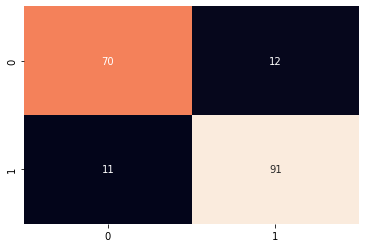

In [53]:
print(classification_report(y_test, y_pred))
      
sns.heatmap(confusion_matrix(y_test,y_pred), cbar=False, annot=True)

In [54]:
acclist = []
ac = accuracy_score(y_test, y_pred)
acclist.append(ac)

In [55]:
acclist

[0.875]

# **Support Vector Machine(SVM)**

In [56]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


In [57]:
svc = SVC(kernel='linear')
model = svc.fit(x_train, y_train)
y_pred = model.predict(x_test)

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        82
           1       0.88      0.90      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



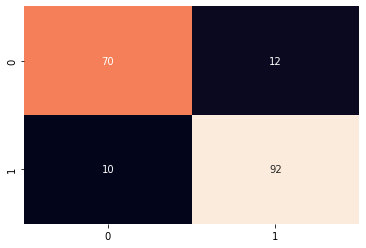

In [58]:
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred), cbar=False, annot=True)
ac = accuracy_score(y_test, y_pred)
acclist.append(ac)

In [59]:
acclist

[0.875, 0.8804347826086957]

# **Random Forest**

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf=RandomForestClassifier(n_estimators=55)
model=rf.fit(x_train,y_train)
y_pred=model.predict(x_test)

              precision    recall  f1-score   support

           0       0.88      0.87      0.87        82
           1       0.89      0.90      0.90       102

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



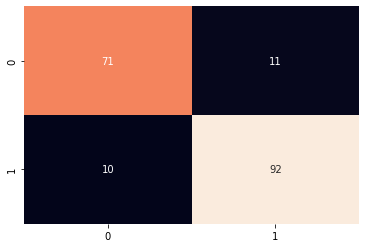

In [62]:
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred), cbar=False, annot=True)
ac = accuracy_score(y_test, y_pred)
acclist.append(ac)

In [63]:
acclist

[0.875, 0.8804347826086957, 0.8858695652173914]

# **Decision Tree**

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dt=DecisionTreeClassifier()
model=dt.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76        82
           1       0.81      0.77      0.79       102

    accuracy                           0.78       184
   macro avg       0.78      0.78      0.78       184
weighted avg       0.78      0.78      0.78       184



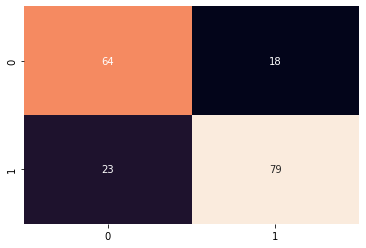

In [68]:
sns.heatmap(confusion_matrix(y_test,y_pred), cbar=False, annot=True)

ac = accuracy_score(y_test, y_pred)
acclist.append(ac)

In [69]:
acclist

[0.875, 0.8804347826086957, 0.8858695652173914, 0.7771739130434783]

# **Gradient Boosting**

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
gb=GradientBoostingClassifier()
model=gb.fit(x_train,y_train)
y_pred=model.predict(x_test)

              precision    recall  f1-score   support

           0       0.90      0.91      0.91        82
           1       0.93      0.92      0.93       102

    accuracy                           0.92       184
   macro avg       0.92      0.92      0.92       184
weighted avg       0.92      0.92      0.92       184



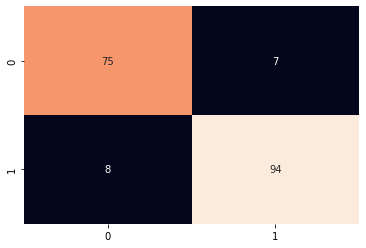

In [72]:
print(classification_report(y_test, y_pred))
      
sns.heatmap(confusion_matrix(y_test,y_pred), cbar=False, annot=True)

ac = accuracy_score(y_test, y_pred)
acclist.append(ac)

In [73]:
acclist

[0.875,
 0.8804347826086957,
 0.8858695652173914,
 0.7771739130434783,
 0.9184782608695652]

# **K-Nearest Neighbor**

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

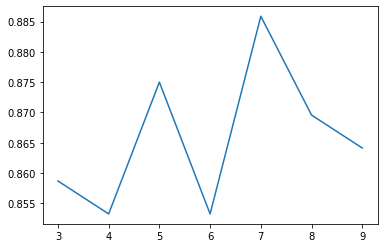

In [75]:
# finding optimum number of neighbors
lst = []
for neighbors in range(3,10):
    classifier = KNeighborsClassifier(n_neighbors=neighbors)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    lst.append(accuracy_score(y_test,y_pred))

plt.plot((range(3,10)), lst)
plt.show()

In [76]:
#Training the kNN on training set with 7 neighbors

classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [77]:
print(classification_report(y_test, y_pred))
      

              precision    recall  f1-score   support

           0       0.88      0.87      0.87        82
           1       0.89      0.90      0.90       102

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



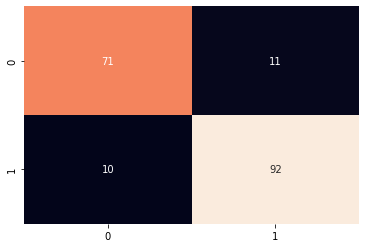

In [78]:
sns.heatmap(confusion_matrix(y_test,y_pred), cbar=False, annot=True)

ac = accuracy_score(y_test, y_pred)
acclist.append(ac)

In [79]:
acclist

[0.875,
 0.8804347826086957,
 0.8858695652173914,
 0.7771739130434783,
 0.9184782608695652,
 0.8858695652173914]

In [82]:
models=['Logistic Regression','SVM','Random Forest','Decision Tree','Gradient Boosting','KNN']

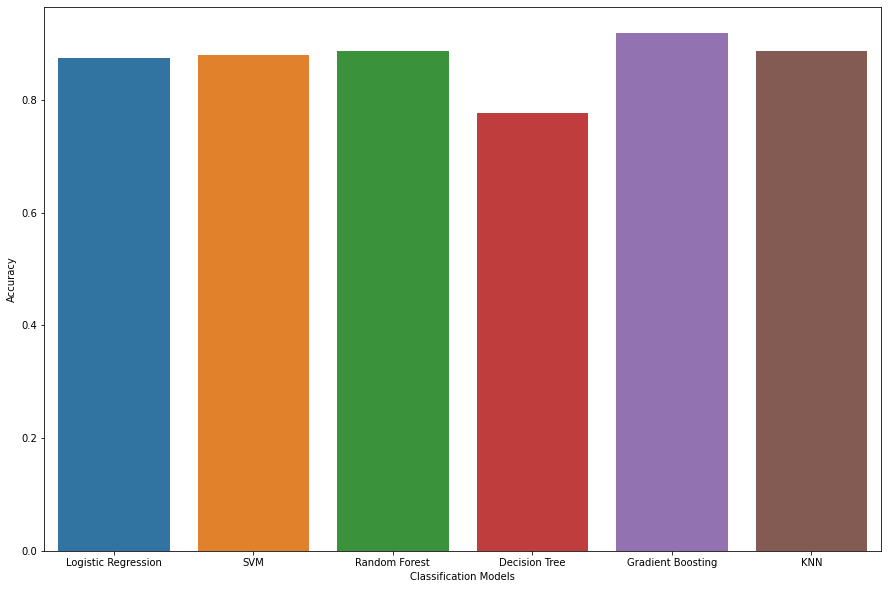

In [83]:
plt.figure(figsize=(15,10))
sns.barplot(x=models, y=acclist)
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.show()